In [99]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import acquire
from acquire import get_iris_data
from acquire import get_telco_data
from acquire import get_titanic_data
import prepare
from prepare import split_data
import os
import env

np.random.seed(123)


# Section 1 - iris_db: Using iris data from our MySQL server and the methods used in the lesson above:

## Acquire, prepare & split your data.

## Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

- Document takeaways & any actions.

In [2]:
iris_query = """SELECT measurements.*
,species.species_name
FROM measurements
JOIN species ON measurements.species_id = species.species_id"""

In [21]:
iris = prepare.prep_iris(get_iris_data(iris_query))
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [100]:
iris = prepare.wrangle_data('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [74]:
train, val, test = prepare.split_data(iris, 'iris')
test

,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,setosa
117,7.7,3.8,6.7,2.2,virginica
17,5.1,3.5,1.4,0.3,setosa
31,5.4,3.4,1.5,0.4,setosa
114,5.8,2.8,5.1,2.4,virginica
70,5.9,3.2,4.8,1.8,versicolor
142,5.8,2.7,5.1,1.9,virginica
131,7.9,3.8,6.4,2.0,virginica
55,5.7,2.8,4.5,1.3,versicolor
84,5.4,3.0,4.5,1.5,versicolor


In [43]:
# separating numeric and categorical columns
# initialize two empty lists
cat_cols, num_cols = [], []
# set up a for loop to build those lists
# so for every column in explore_columns
for col in train:
    # check to see its an object type
    # if so toss in categorical
    if train[col].dtype == 'O':
        cat_cols.append(col)
    # if its numeric:
    else:
        # check to see if we have more than just a few values
        # if so toss it in categorical
        if train[col].nunique() < 10:
            cat_cols.append(col)
        # and otherwise call it continuous by elimination
        else:
            num_cols.append(col)

In [46]:
print(cat_cols)
print(num_cols)

['species']
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


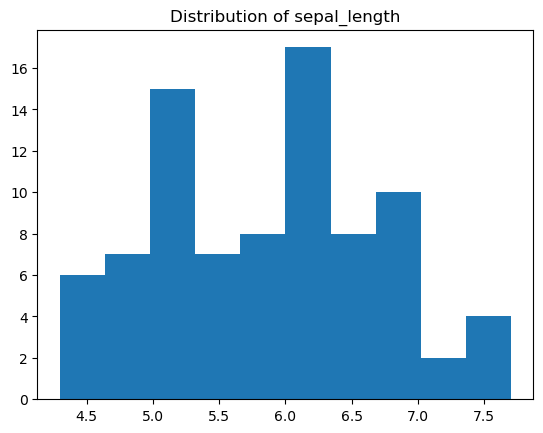

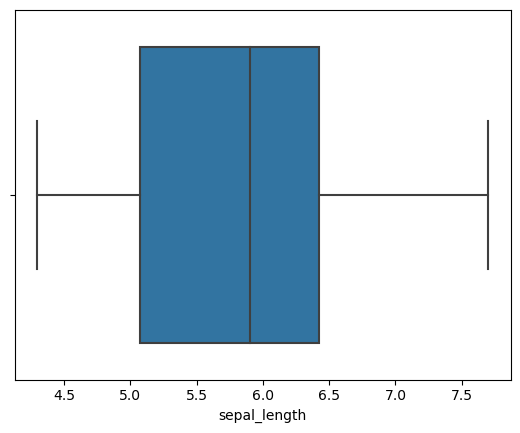

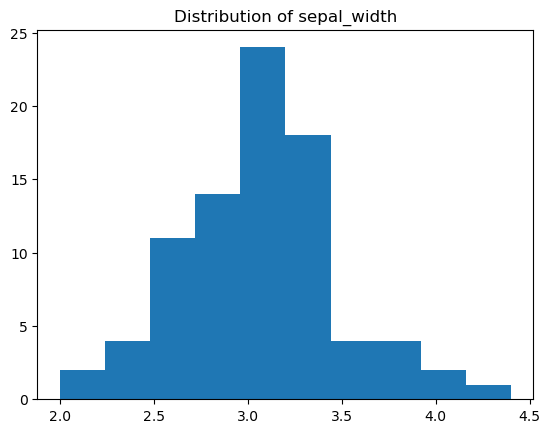

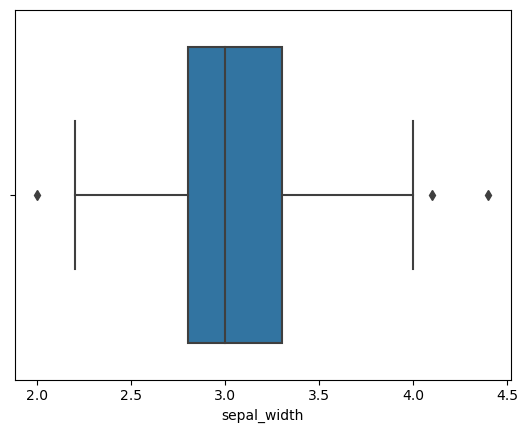

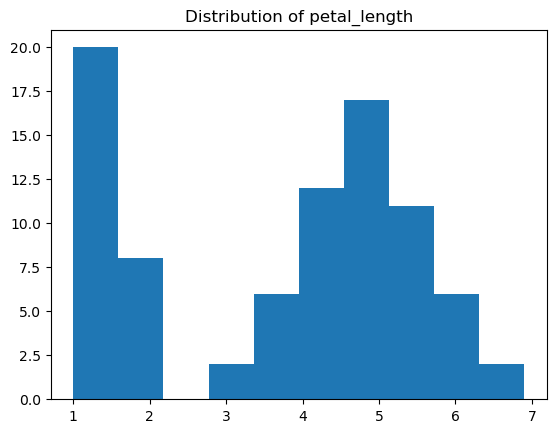

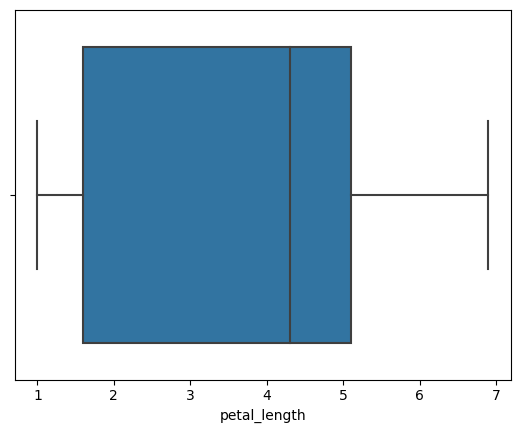

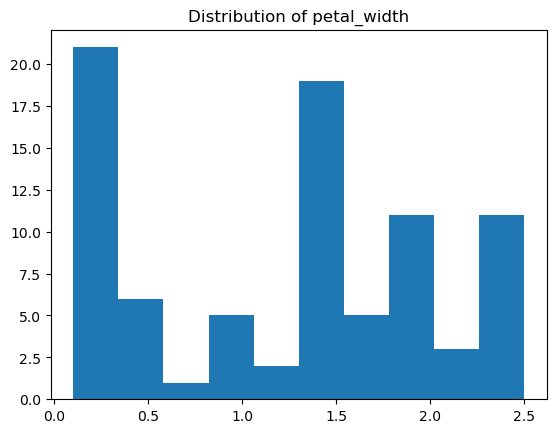

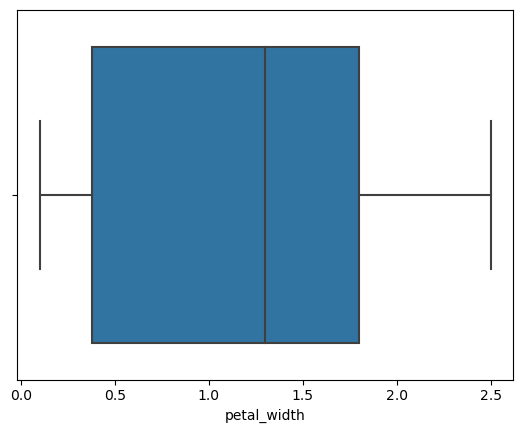

In [48]:
for col in num_cols:
    plt.hist(train[col])
    plt.title(f'Distribution of {col}')
    plt.show()
    sns.boxplot(data=train, x=col)
    plt.show()
 

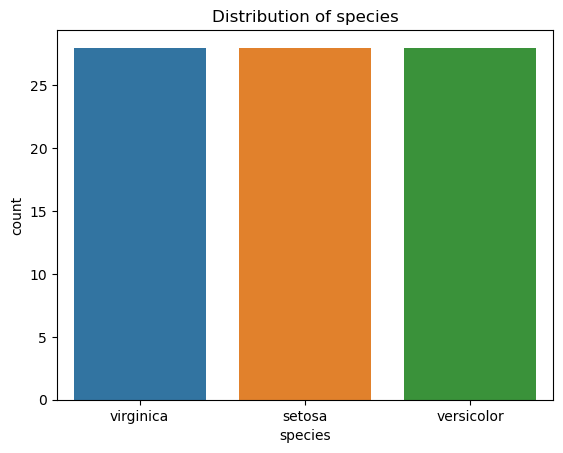

In [87]:
for col in cat_cols:
    sns.countplot(data=train, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

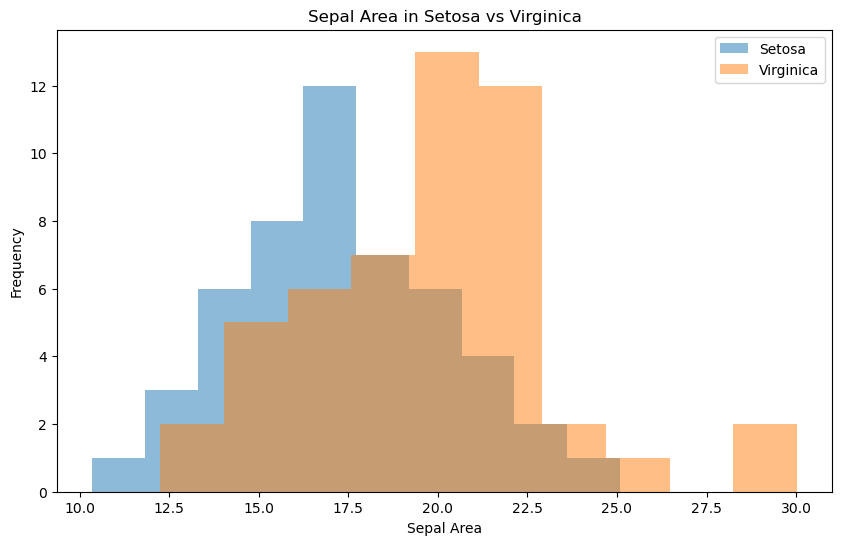

Stat=-3.7835508965416054, p=0.00026621177924123103


In [86]:
from scipy.stats import ttest_ind

# Assuming df is your DataFrame and it has columns 'species', 'sepal_length', 'sepal_width'
iris['sepal_area'] = iris['sepal_length'] * iris['sepal_width']

# Separate the data
setosa = iris[iris['species'] == 'setosa']['sepal_area']
virginica = iris[iris['species'] == 'virginica']['sepal_area']

# Plot the data
plt.figure(figsize=(10, 6))
plt.hist(setosa, alpha=0.5, label='Setosa')
plt.hist(virginica, alpha=0.5, label='Virginica')
plt.legend(loc='upper right')
plt.xlabel('Sepal Area')
plt.ylabel('Frequency')
plt.title('Sepal Area in Setosa vs Virginica')
plt.show()


# Perform t-test (assuming independence, normality, equal variance)
stat, p = ttest_ind(setosa, virginica)
print(f'Stat={stat}, p={p}')



- This code first calculates the sepal area by multiplying sepal length and width. 
- It then separates the data for setosa and virginica species. 
- A histogram is plotted for each species’ sepal area. 
- Finally, it performs a t-test to check if there’s a significant difference in the sepal areas of the two species.

# Part II
## Explore your titanic dataset more completely.

- Determine drivers of the target variable
- Determine if certain columns should be dropped
- Determine if it would be valuable to bin some numeric columns
- Determine if it would be valuable to combine multiple columns into one.
- Does it make sense to combine any features?

## Do you find any surprises?

## Document any and all findings and takeaways in your notebook using markdown.

In [88]:
titanic_query = "SELECT * FROM passengers"

In [94]:
titanic = prepare.prep_titanic(get_titanic_data(titanic_query))
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Southampton,1
887,1,1,female,19.0,0,0,30.0000,Southampton,1
888,0,3,female,30.0,1,2,23.4500,Southampton,0
889,1,1,male,26.0,0,0,30.0000,Cherbourg,1


In [101]:
titanic = prepare.wrangle_data('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Southampton,1
887,1,1,female,19.0,0,0,30.0000,Southampton,1
888,0,3,female,30.0,1,2,23.4500,Southampton,0
889,1,1,male,26.0,0,0,30.0000,Cherbourg,1


In [102]:
train, val, test = prepare.split_data(titanic, 'titanic')
test

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
691,1,3,female,4.0,0,1,13.4167,Cherbourg,0
762,1,3,male,20.0,0,0,7.2292,Cherbourg,1
869,1,3,male,4.0,1,1,11.1333,Southampton,0
174,0,1,male,56.0,0,0,30.6958,Cherbourg,1
45,0,3,male,30.0,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,Southampton,0
221,0,2,male,27.0,0,0,13.0000,Southampton,1
134,0,2,male,25.0,0,0,13.0000,Southampton,1
262,0,1,male,52.0,1,1,79.6500,Southampton,0


## $H_0$(null hypothesis): that pclass had nothing to do with survival

## $H_a$(alternative hypothesis): that pclass had to with survival

In [108]:
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(titanic["survived"], titanic["pclass"])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Stat : {chi2}")
print(f"P-value : {p}")

Chi-square Statistic : 102.88898875696056
P-value : 4.549251711298793e-23


In [110]:
alpha = .05

if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


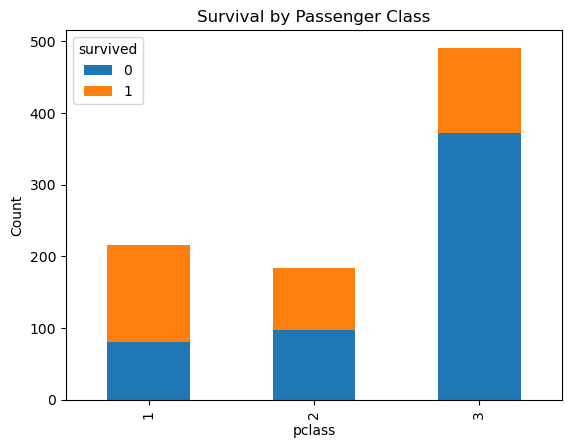

In [106]:
grouped = titanic.groupby(['pclass', 'survived'])
pclass_survived = grouped.size().unstack()

pclass_survived.plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.title('Survival by Passenger Class')
plt.show()